http://www.nltk.org/book/ch03.html

### Goals:

1. How can we write programs to access text from local files and from the web, in order to get hold of an unlimited range of language material?
2. How can we split documents up into individual words and punctuation symbols, so we can carry out the same kinds of analysis we did with text corpora in earlier chapters?
3. How can we write programs to produce formatted output and save it in a file?

### Accessing Text from the Web and from Disk

You can browse the catalog of 25,000 free online books at http://www.gutenberg.org/catalog/, and obtain a URL to an ASCII text file.

Text number 2554 is an English translation of Crime and Punishment, and we can access it as follows.

In [145]:
import nltk
from nltk import word_tokenize
from nltk import FreqDist # need this to access "most_common" method

import urllib2

#### Processing HTML documents

In [146]:
url = "http://www.gutenberg.org/files/2554/2554.txt"
response = urllib2.urlopen(url)
raw = response.read().decode('utf8')
type(raw)
len(raw)

1176896

In [147]:
tokens = word_tokenize(raw)
tokens[:10]

[u'The',
 u'Project',
 u'Gutenberg',
 u'EBook',
 u'of',
 u'Crime',
 u'and',
 u'Punishment',
 u',',
 u'by']

#### Calculate most common words, but mostly of these are punctuations like ",", ".", "the", ...

In [148]:
freq_dist = nltk.FreqDist(tokens)
freq_dist.most_common(20)

[(u',', 16177),
 (u'.', 10536),
 (u'the', 7431),
 (u'and', 6279),
 (u'to', 5276),
 (u'a', 4464),
 (u'I', 4334),
 (u"''", 4192),
 (u'of', 3846),
 (u'``', 3739),
 (u'he', 3520),
 (u'you', 3485),
 (u'in', 3097),
 (u'that', 3049),
 (u'it', 2928),
 (u'was', 2831),
 (u'!', 2364),
 (u'?', 2275),
 (u'his', 1999),
 (u'at', 1945)]

#### Now let's get rid of the punctuations

In [149]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [150]:
new_tokens = tokenizer.tokenize(raw)
freq_dist = nltk.FreqDist(new_tokens)
freq_dist.most_common(20)

[(u'the', 7437),
 (u'and', 6290),
 (u'to', 5413),
 (u'a', 4472),
 (u'I', 4401),
 (u'of', 3848),
 (u'he', 3633),
 (u'you', 3506),
 (u'in', 3099),
 (u'that', 3068),
 (u'it', 2945),
 (u'was', 2803),
 (u'his', 1999),
 (u'at', 1945),
 (u'her', 1772),
 (u's', 1756),
 (u'not', 1725),
 (u'with', 1723),
 (u'for', 1598),
 (u'him', 1579)]

#### Exclude the stop words

In [151]:
from nltk.corpus import stopwords

tokens_no_stop_words = []
for word in new_tokens:
    if word not in stopwords.words('English'):
        tokens_no_stop_words.append(word)
        
freq_dist = nltk.FreqDist(tokens_no_stop_words)
freq_dist.most_common(20)

[(u'I', 4401),
 (u'He', 1259),
 (u'Raskolnikov', 784),
 (u'And', 747),
 (u'But', 683),
 (u'You', 602),
 (u'one', 586),
 (u'The', 554),
 (u'would', 553),
 (u'know', 528),
 (u'said', 518),
 (u'It', 515),
 (u'could', 486),
 (u'What', 477),
 (u'man', 475),
 (u'like', 451),
 (u'She', 442),
 (u'come', 426),
 (u'though', 413),
 (u'Sonia', 402)]

### To plot, you can turn the most_common list to a dataframe

In [152]:
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
df = pd.DataFrame(freq_dist.most_common(20), columns=['word', 'frequency'])
df.head(5)

,word,frequency
0,I,4401
1,He,1259
2,Raskolnikov,784
3,And,747
4,But,683


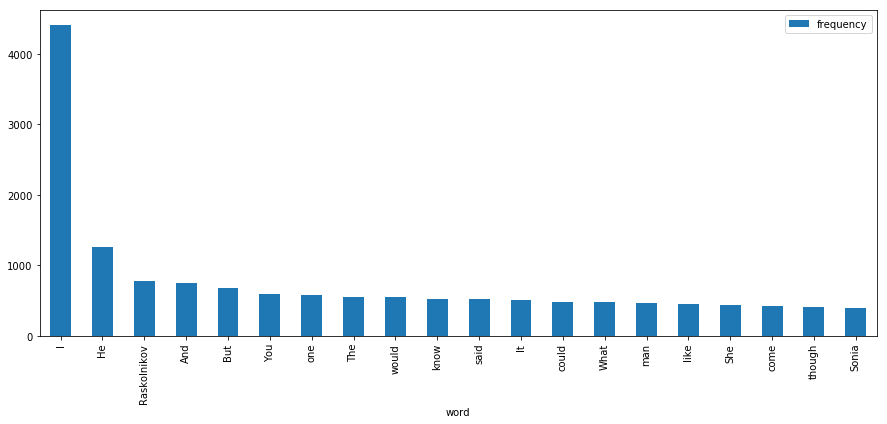

In [154]:
df.plot(x='word', y='frequency', kind='bar', figsize=(15,6))

### Use plotly to plot this

In [155]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)  # use plotly.offline (injects the plotly.js source files into the notebook)
from plotly import tools
import plotly.tools as tls

In [156]:
figure_size=(16,6)

# Multiplier of Standard Deviations
Times_of_Standard_Deviation = 1

Chart_Title_Font_Size = 20

xaxis_font_size = 16
yaxis_font_size = 16
legend_font_size = 12

In [157]:
data = [go.Bar(
            x=df.word,
            y=df.frequency
    )]

layout = go.Layout(showlegend=True, title="Word Frequency", font=dict(size=Chart_Title_Font_Size),
                   yaxis=dict(title='Number of appearance', titlefont=dict(size=yaxis_font_size)
                              , tickfont=dict(size=yaxis_font_size)), 
                   xaxis=dict(title='Words', titlefont=dict(size=xaxis_font_size)
                              , tickfont=dict(size=yaxis_font_size))
                  )

# py.iplot(data, filename='basic-bar')
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='')
figs.append(fig)

### Use BeautifulSoup to get text out of HTML

http://www.crummy.com/software/BeautifulSoup/

In [158]:
from bs4 import BeautifulSoup

In [166]:
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"

html = urllib2.urlopen(url).read().decode('utf8')

In [167]:
raw = BeautifulSoup(html).get_text()
tokens = word_tokenize(raw)

In [170]:
tokens[:5]

[u'BBC', u'NEWS', u'|', u'Health', u'|']

### Read local files

In [172]:
raw = open('file1.txt').read()

In [177]:
tokens = word_tokenize(raw)
nltk.FreqDist(raw).most_common(5)

[(' ', 202), ('e', 118), ('o', 97), ('t', 96), ('n', 79)]

#### List all files under a directory

In [178]:
import os
os.listdir('.')

['.DS_Store',
 '.ipynb_checkpoints',
 '1 - Computing with Language - Texts and Words.ipynb',
 '2 - Accessing Text Corpora and Lexical Resources.ipynb',
 '3 - Processing Raw Text.ipynb',
 'file1.txt',
 'sample1.txt',
 'sample2.txt',
 'sample3.txt',
 'Untitled.ipynb']

#### Read one line at a time:

In [179]:
file_ = open('file1.txt', 'r')
for line in file_:
    print line.strip()

2.6   Summary

A text corpus is a large, structured collection of texts. NLTK comes with many corpora, e.g., the Brown Corpus, nltk.corpus.brown.
Some text corpora are categorized, e.g., by genre or topic; sometimes the categories of a corpus overlap each other.
A conditional frequency distribution is a collection of frequency distributions, each one for a different condition. They can be used for counting word frequencies, given a context or a genre.
Python programs more than a few lines long should be entered using a text editor, saved to a file with a .py extension, and accessed using an import statement.
Python functions permit you to associate a name with a particular block of code, and re-use that code as often as necessary.
Some functions, known as "methods", are associated with an object and we give the object name followed by a period followed by the function, like this: x.funct(y), e.g., word.isalpha().
To find out about some variable v, type help(v) in the Python interactive

### NLTK pipeline

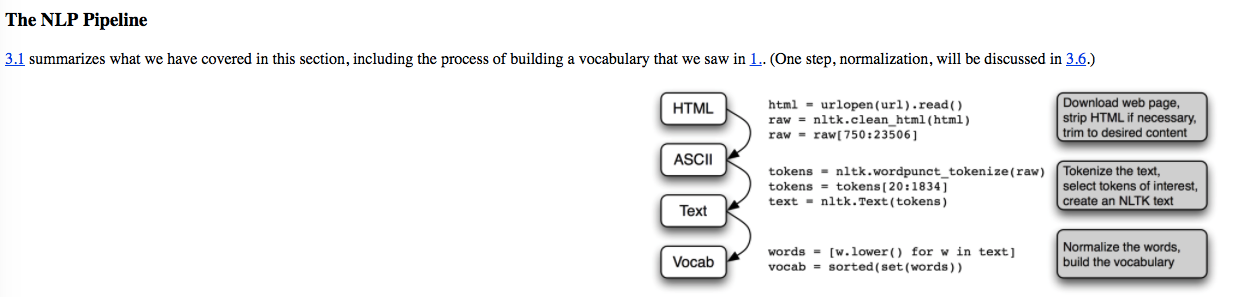

In [183]:
from IPython.display import Image
Image(filename='ss1.png')

### Processing strings

#### Use backslash to join multiple lines into one

In [184]:
couplet = "Shall I compare thee to a Summer's day?"\
          "Thou are more lovely and more temperate:"
couplet

"Shall I compare thee to a Summer's day?Thou are more lovely and more temperate:"

In [195]:
sentence = "This is a lovely day."

In [196]:
sentence.find('T')

0

In [197]:
sentence.find('h')

1

In [198]:
sentence.find('i')

2

In [200]:
sentence.find('lovely')

10

In [204]:
sentence.split()

['This', 'is', 'a', 'lovely', 'day.']

### Text processing with Unicode

Unicode supports over a million characters. Each character is assigned a number, called a code point. In Python, code points are written in the form \uXXXX, where XXXX is the number in 4-digit hexadecimal form.

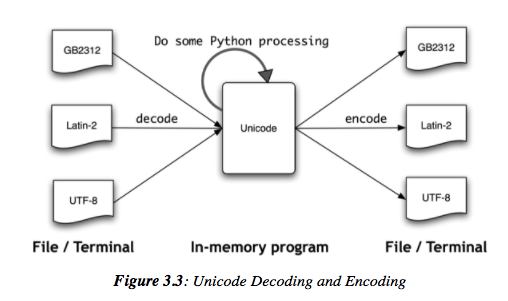

In [206]:
Image(filename='ss2.png')